In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("C:\\Users\\Neuronimbus\\Desktop\\mlprojects\\SportsPersonClassifier\\model\\test_images\\sharapova1.jpg")
img.shape

(555, 700, 3)

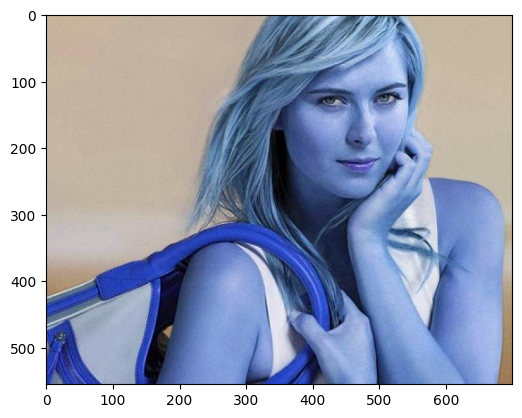

In [3]:
plt.imshow(img)

In [4]:
grayimg= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayimg.shape

(555, 700)

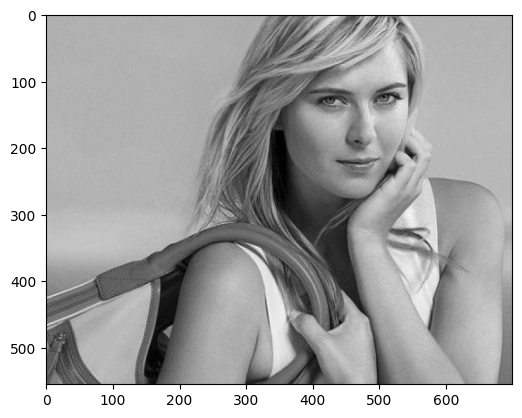

In [5]:
plt.imshow(grayimg, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\Neuronimbus\\Desktop\\mlprojects\\SportsPersonClassifier\\model\\opencv\\haarcascades\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\Neuronimbus\\Desktop\\mlprojects\\SportsPersonClassifier\\model\\opencv\\haarcascades\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(grayimg,scaleFactor=1.1, minNeighbors=5)
faces

array([[355,  39, 230, 230]])

In [7]:
x,y,w,h=faces[0]
x,y,w,h

(355, 39, 230, 230)

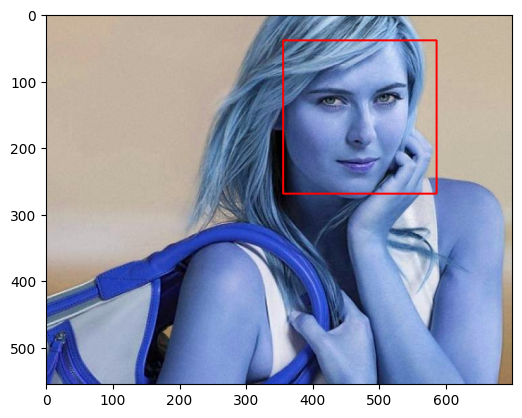

In [8]:
faceimg=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(faceimg)

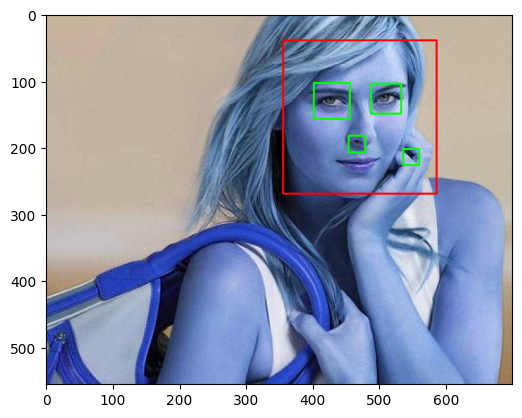

In [9]:
cv2.destroyAllWindows()
for x,y,w,h in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    gray_img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    roi_gray=gray_img[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes= eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

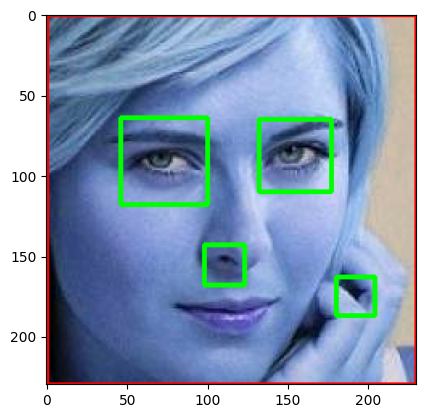

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

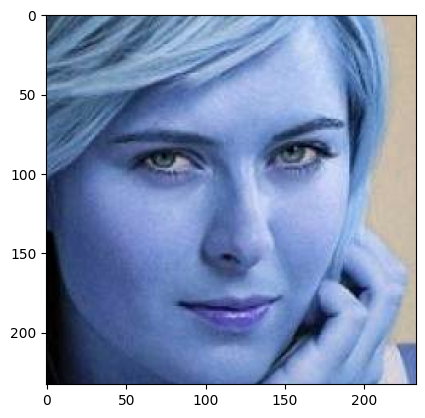

In [12]:
cropped_image = get_cropped_image_if_2_eyes('C:\\Users\\Neuronimbus\\Desktop\\mlprojects\\SportsPersonClassifier\\model\\test_images\\sharapova1.jpg')
plt.imshow(cropped_image)

In [13]:
path_to_data = "C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/"
path_to_cr_data = "C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped/"

In [14]:
import os 
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped',
 'C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/lionel_messi',
 'C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/maria_sharapova',
 'C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/roger_federer',
 'C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/serena_williams',
 'C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/virat_kohli']

In [15]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [16]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name= img_dir.split("/")[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            croped_folder=path_to_cr_data +"/" +celebrity_name
            if not os.path.exists(croped_folder):
                os.makedirs(croped_folder)
                cropped_image_dirs.append(croped_folder)
                print("Generating cropped images in folder: ",croped_folder)
            croped_file_name=celebrity_name+ str(count)+".png"
            croped_file_path=croped_folder+ "/"+croped_file_name
            cv2.imwrite(croped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(croped_file_path)
            count += 1



Generating cropped images in folder:  C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped//lionel_messi
Generating cropped images in folder:  C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped//maria_sharapova
Generating cropped images in folder:  C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped//roger_federer
Generating cropped images in folder:  C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped//serena_williams
Generating cropped images in folder:  C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped//virat_kohli


In [17]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

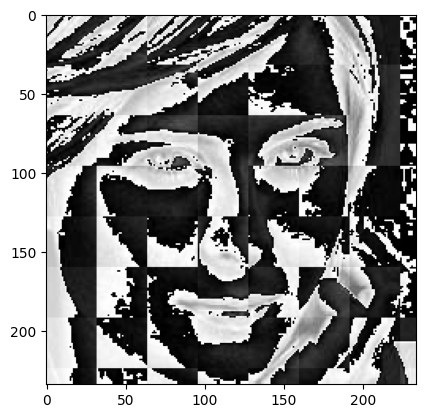

In [18]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [19]:
celebrity_file_names_dict

{'cropped': [],
 'lionel_messi': ['C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped//lionel_messi/lionel_messi1.png',
  'C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped//lionel_messi/lionel_messi2.png',
  'C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped//lionel_messi/lionel_messi3.png',
  'C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped//lionel_messi/lionel_messi4.png',
  'C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped//lionel_messi/lionel_messi5.png',
  'C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped//lionel_messi/lionel_messi6.png',
  'C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped//lionel_messi/lionel_messi7.png',
  'C:/Users/Neuronimbus/Desktop/mlprojects/SportsPersonClassifier/model/dataset/cropped//lionel_messi/lionel_messi

In [20]:
class_dect={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    if celebrity_name !='cropped':
     class_dect[celebrity_name]=count
     count = count+1
class_dect    

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [21]:
X, y=[],[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img, (32,32))
        img_har=w2d(img,'db1',5)
        scalled_har_img=cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_har_img.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dect[celebrity_name])

In [22]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [23]:
len(X[0])

4096

In [24]:
len(X)

186

In [25]:
y[0]

0

In [26]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(186, 4096)

In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=0)

In [29]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8297872340425532

In [30]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.70      1.00      0.82         7
           2       1.00      0.50      0.67         6
           3       0.73      0.80      0.76        10
           4       0.93      0.93      0.93        14

    accuracy                           0.83        47
   macro avg       0.85      0.81      0.80        47
weighted avg       0.85      0.83      0.83        47



In [31]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [44]:
model_params = {
 'svm':{
     'model': svm.SVC(gamma='auto',probability=True),
     'params':{
      'svc__C':[1,10,100,1000],
     'svc__kernel':['rbf','linear']
     }
 },

'random_forest':{
    'model':RandomForestClassifier(),
    'params':
        {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
 },
 'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}
 

In [33]:
# scores = []
# best_estimators = {}
# import pandas as pd
# for model_name, values in model_params:
#     pipe = make_pipeline(StandardScaler(), values['model'])
#     clf = GridSearchCV(pipe,values['params'], cv=5, return_train_score=False)
#     clf.fit(X_train, y_train)
#     scores.append({
#         "model":model_name,
#         "best_score":clf.best_score_,
#         "best_params":clf.best_params_
#      }
#     )
#     best_estimators[algo] = clf.best_estimator_
     
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df


scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.784392,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.654233,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.748942,{'logisticregression__C': 1}


In [34]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [35]:
best_estimators['svm'].score(X_test, y_test)

0.8297872340425532

In [36]:
best_estimators['random_forest'].score(X_test, y_test)

0.5957446808510638

In [37]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.851063829787234

In [38]:
best_clf=best_estimators['svm']

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  1,  2],
       [ 0,  7,  0,  0,  0],
       [ 1,  0,  5,  0,  0],
       [ 0,  1,  0,  9,  0],
       [ 2,  1,  0,  0, 11]], dtype=int64)

In [40]:
class_dect

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

Text(33.22222222222222, 0.5, 'Truth')

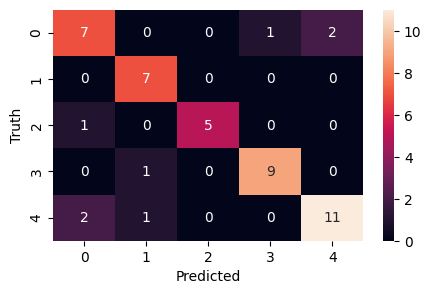

In [43]:
import seaborn as sn
plt.figure(figsize = (5,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [47]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dect))